In [7]:
#import axion_ppa
import priors
import ppa
from ppa import svd_inv
import numpy as np
import matplotlib.pyplot as plt
import json
import numpy.linalg as nl
import scipy.linalg as sl
import mpmath
mpmath.mp.dps=30
print(mpmath.mp)

import matplotlib as mpl
import matplotlib.pyplot as plt
import glob
import scipy.constants as sc
from astropy.time import Time
plt.rc('font',**{'family':'serif','serif':['Times']})
mpl.rcParams['font.size'] = 13
#mpl.rcParams['font.family'] = 'serif'
#mpl.rcParams['font.sans-serif'] = ['DejaVu Sans']
mpl.rcParams['axes.linewidth'] = 1
mpl.rcParams['lines.linewidth'] = 2.5
mpl.rcParams['patch.linewidth'] = 1

# Changing this will affect the size of the plot in Jupyter notebook as well as resolution of the final PDF. Can change later
plt.rcParams['figure.dpi'] = 100

#mpl.rcParams['mathtext.fontset'] = 'custom'
#mpl.rcParams['mathtext.rm'] = 'Serif'
#mpl.rcParams['mathtext.it'] = 'Serif:italic'
#mpl.rcParams['mathtext.bf'] = 'Serif:bold'

# tick parameters:
mpl.rcParams['xtick.top'] = True
mpl.rcParams['ytick.right'] = True


mpl.rcParams['xtick.minor.visible'] = True
mpl.rcParams['ytick.minor.visible'] = True
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['xtick.direction'] = 'in'
    
mpl.rcParams['xtick.major.size'] = 6  # default 3.5
mpl.rcParams['ytick.major.size'] = 6  # default 3.5
mpl.rcParams['xtick.minor.size'] =  3  # default 2 
mpl.rcParams['ytick.minor.size'] = 3  # default 2 
    
mpl.rcParams['xtick.major.width'] = 1  # default 0.8
mpl.rcParams['ytick.major.width'] = 1  # default 0.8
mpl.rcParams['xtick.minor.width'] =1  # default 0.6
mpl.rcParams['ytick.minor.width'] = 1  # default 0.6



PSR_DICT= ppa.Load_All_Pulsar_Info()
PSR_NAME_LIST = list(PSR_DICT.keys())

Mpmath settings:
  mp.prec = 103               [default: 53]
  mp.dps = 30                 [default: 15]
  mp.trap_complex = False     [default: False]


In [8]:
pulsars1 = [ppa.Pulsar(PSR_DICT[psrn],iono="Subt",order=2,subset=["20cm"]) for psrn in PSR_DICT]
pulsars = [ppa.Pulsar(PSR_DICT[psrn],iono="None",order=2,subset=["20cm"]) for psrn in PSR_DICT]

pulsars1 = [p for p in pulsars1 if len(p.SUBSETS)>0]
pulsars = [p for p in pulsars if len(p.SUBSETS)>0]
for i in range(19):
    psr1 = pulsars1[i]
    psr0 = pulsars[i]
    print( "%.4f"%np.std(psr1.DPA[0]) , "%.4f"%np.std(psr0.DPA[0]) )

0.1748 0.1771
0.1986 0.1959
0.3487 0.3501
0.2759 0.2824
0.1278 0.1230
0.1220 0.1319
0.4645 0.4611


IndexError: list index out of range

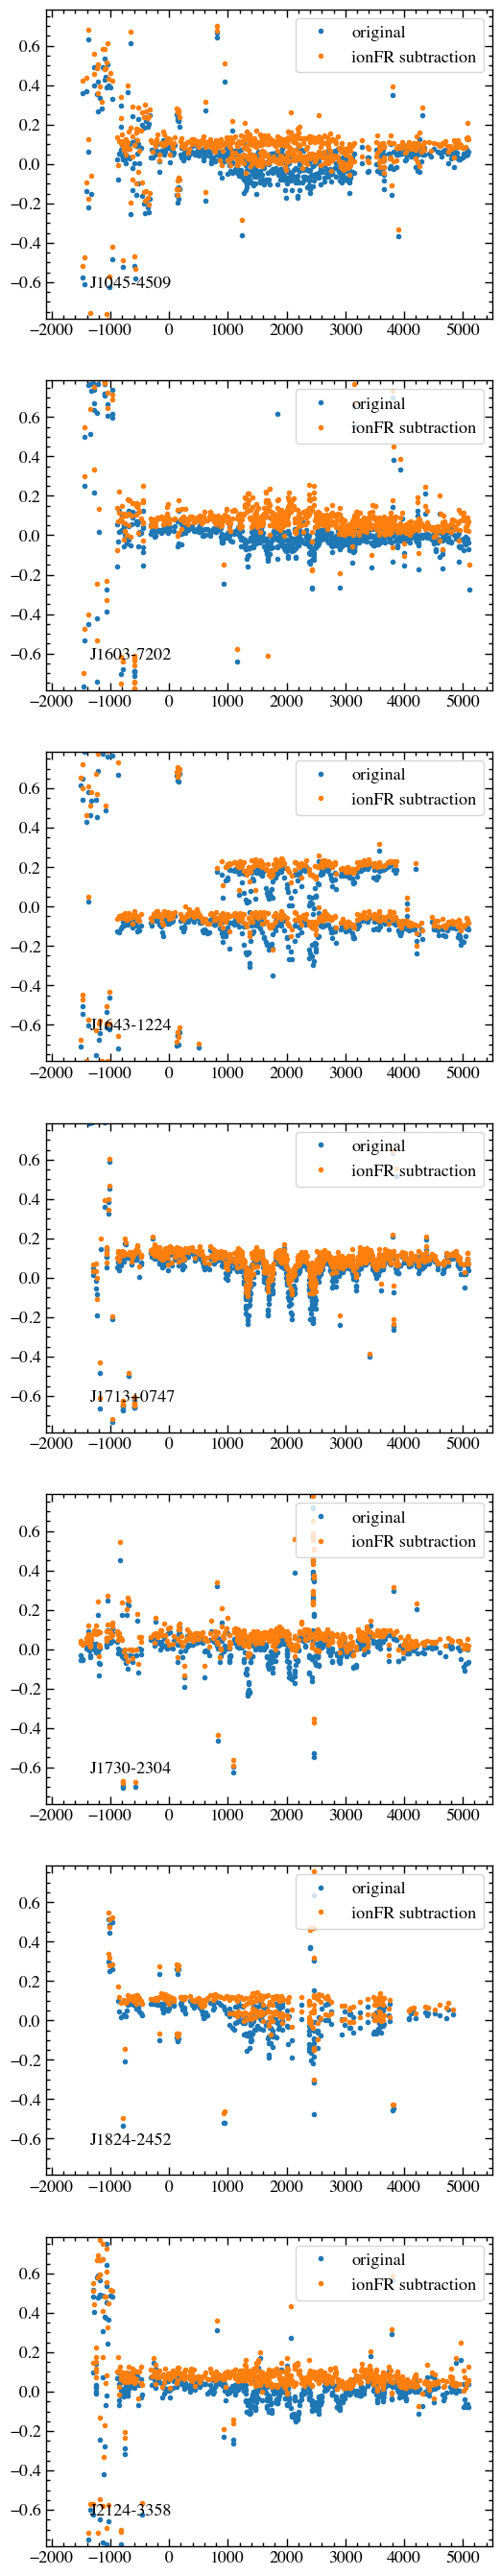

In [9]:
array1 = ppa.Array(pulsars1)
array0 = ppa.Array(pulsars)
NPSR = array0.NPSR
plt.subplots(NPSR,1,figsize=(6,5*NPSR),sharex=True,sharey=True)
for i in range(NPSR):
    plt.subplot(NPSR,1,i+1)
    plt.plot(array0.TOA[i][0] , array0.DPA[i][0],'.',label="original")
    plt.plot(array1.TOA[i][0] , array1.DPA[i][0],'.',label="ionFR subtraction")
    plt.ylim(-np.pi/4,np.pi/4)
    plt.annotate(array0.PSR_NAMES[i],xy=(0.1,0.1),xycoords="axes fraction")
    plt.xlim(-2100,5500)
    plt.legend(loc=1)
plt.savefig("ionFR_20.jpg",bbox_inches='tight')

In [4]:
pulsars1 = [ppa.Pulsar(PSR_DICT[psrn],iono="Subt",order=2,subset="10cm") for psrn in PSR_DICT]
pulsars = [ppa.Pulsar(PSR_DICT[psrn],iono="None",order=2,subset="10cm") for psrn in PSR_DICT]
array = ppa.Array(pulsars1)
test1 = array.Gen_White_Mock_Data()


lnlike = array.Generate_Lnlike_Function(method="Auto")
#lnlike( np.zeros(22+26) , np.ones(22+26)*-10 , np.ones(27) , -22,-10  )

In [8]:
NPSR = 19
NSS = 19
groups = [np.arange(19*3+3) , [0, 2*NSS+NPSR+1 , 2*NSS+NPSR + 2  ]]

iss = 1
groups = []
for ipsr in range(NPSR):
    g = []
    nss = len( array.SUBSETS[ipsr] )
    g += np.arange(iss,iss+nss).tolist()
    g += np.arange(iss+NSS,iss+nss+NSS).tolist()
    g += [1+2*NSS+ipsr]
    iss += nss
    groups.append(g)
groups

[[1, 20, 39],
 [2, 21, 40],
 [3, 22, 41],
 [4, 23, 42],
 [5, 24, 43],
 [6, 25, 44],
 [7, 26, 45],
 [8, 27, 46],
 [9, 28, 47],
 [10, 29, 48],
 [11, 30, 49],
 [12, 31, 50],
 [13, 32, 51],
 [14, 33, 52],
 [15, 34, 53],
 [16, 35, 54],
 [17, 36, 55],
 [18, 37, 56],
 [19, 38, 57]]

# Mock

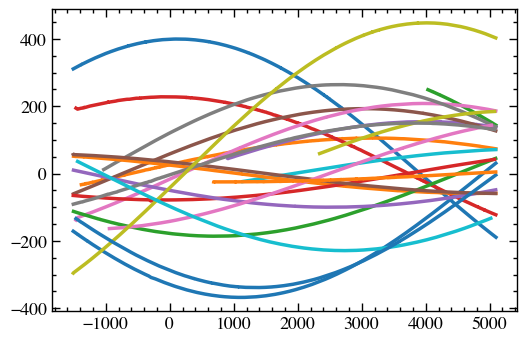

In [ ]:

test2 = array.Gen_Red_Mock_Data("auto" , -23.5 , 2,seed=None)
for i in range(22):
    plt.plot(array.TOA[i][0],test2[i][0])

In [ ]:
pulsars = [ppa.Pulsar(PSR_DICT[psrn]) for psrn in PSR_DICT][:]
array = ppa.Array(pulsars)
ma = 1e-23
Phi_blocks = array.Get_Sigma(1e-3,ma,np.ones(len(pulsars)))
Phi = np.array(np.block( Phi_blocks.tolist() ) )
F,F_by_SS = array.Get_F(ma)
#self=array
Sigma = F.T @ Phi @ F

pointer = np.concatenate([[0],np.cumsum(np.concatenate(array.NOBS))])


In [ ]:
_Phi = array.Get_Sigma( 1e-3 , ma ,np.ones(len(pulsars)) )
_Phi_Full = np.block( _Phi.tolist() )  
_Phi_Auto = np.diag( np.diag(_Phi_Full) )

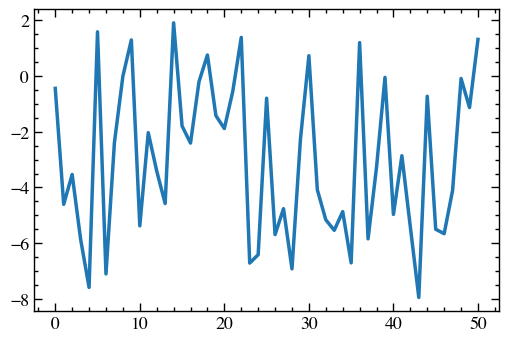

In [60]:
Slimit = np.array([-4.422e-01, -4.608e+00, -3.534e+00, -5.861e+00, -7.593e+00,
        1.589e+00, -7.105e+00, -2.386e+00, -5.587e-03,  1.299e+00,
       -5.379e+00, -2.033e+00, -3.408e+00, -4.579e+00,  1.911e+00,
       -1.793e+00, -2.407e+00, -2.042e-01,  7.570e-01, -1.421e+00,
       -1.884e+00, -5.447e-01,  1.390e+00, -6.717e+00, -6.417e+00,
       -7.965e-01, -5.695e+00, -4.763e+00, -6.926e+00, -2.274e+00,
        7.315e-01, -4.087e+00, -5.162e+00, -5.541e+00, -4.868e+00,
       -6.710e+00,  1.201e+00, -5.847e+00, -3.279e+00, -4.809e-02,
       -4.971e+00, -2.861e+00, -5.421e+00, -7.951e+00, -7.259e-01,
       -5.502e+00, -5.662e+00, -4.102e+00, -8.702e-02, -1.132e+00,
        1.318e+00])
plt.plot(Slimit)